# **Deep Learning Basics**
# *Understanding and Training Neural Networks*

![description](https://img.freepik.com/premium-photo/flat-ai-powered-brain-with-glowing-digital-connections-concept-as-glowing-abstract-digital-brain-p_980716-675764.jpg)


**Authors**  :Al-Hassen Sabeeh ,Ibraheem Al-Hafiz,Tsabeeh Hamed ,Rama Abdelgadir

© IndabaX Sudan 2025.

# *1. Introduction to Deep Learning*
### *What is Deep Learning?*
   Deep Learning is a subfield of machine learning that uses artificial neural networks with many layers ("deep" networks)
to learn and make intelligent decisions from data. Instead of being explicitly programmed to perform a task, these models
learn from vast amounts of data.
  
  Simple Analogy: Think of it as a child learning to identify a cat. You don't tell the child the rules about whiskers,
fur, and tails. You just show them many pictures of cats and "not cats." Eventually, their brain (a deep neural network) learns
the complex patterns that define a "cat." Deep learning does the same with data.


### *Why "Deep" (Many Layers)?*

The "depth" of the network—meaning the number of layers—is crucial. Each layer learns to recognize different levels of features or patterns from the input data:

·   First Layers: Learn simple, low-level features (e.g., edges, corners, curves in an image).

·   Middle Layers: Combine these simple features to form more complex ones (e.g., eyes, noses).

·   Final Layers: Combine the complex features to make a high-level decision (e.g., "this is a face,").

![description](https://preview.redd.it/w99s8jofwi751.jpg?width=1080&crop=smart&auto=webp&s=a3e1e5c6cf4f56f648d1357e577aaac32e3506d9)

This hierarchy of features allows deep networks to model very complex, non-linear relationships that are impossible for simpler models.


### *Machine Learning vs Deep Learning: Comprehensive Comparison*

![description](https://www.mygreatlearning.com/blog/wp-content/uploads/2023/07/ml-dl-difference-683x1024.webp)


### *When/Why We Use DL*

Use Deep Learning when:

·   The Problem is Very Complex: Like translating between languages or driving a car.

·   You Have Massive Unstructured Data: Millions of images, hours of audio, vast text corpora.

·   The Features are Hard to Define Manually: How would you manually write rules to describe a cat in all possible lighting conditions and angles? DL learns this automatically.

·   High Accuracy is Critical: And you have the computational resources to achieve it.


# 2. Biological Inspiration & Artificial Neurons



### *From Human Neuron to Artificial Neuron*

· Biological Neuron: A brain cell that receives electrical signals from other neurons through dendrites. If the combined signal is strong enough, the neuron "fires," sending a signal down its axon to other neurons.

  · Dendrites -> Inputs
  
  · Cell Body -> Summation and Activation
  
  · Axon -> Output
  
· Artificial Neuron (Perceptron): A mathematical model inspired by this biology.

![description](https://miro.medium.com/v2/resize:fit:786/format:webp/1*kSa4PqBk-lsvdqiCBIKCDg.jpeg)

### *2.2 Inputs, Weights, Bias, Output*

1. Inputs (x₁, x₂, ...): The data coming into the neuron (like signals from dendrites).
2. Weights (w₁, w₂, ...): The strength of the connection for each input. A higher weight means the input is more important.
3. Bias (b): A constant value that allows the neuron to shift its activation function, adding flexibility. It's like a baseline propensity to fire.
4. Summation Function: The neuron calculates the weighted sum of its inputs plus the bias: z = (x₁*w₁ + x₂*w₂ + ...) + b
5. Activation Function (f): A function that decides whether the neuron should "fire" or not based on the weighted sum z. It introduces non-linearity, allowing the network to learn complex patterns. A common example is the ReLU function, which outputs z if z is positive, otherwise 0.
6. Output (y): The final value after passing the sum through the activation

![description](https://www.researchgate.net/profile/Soojun-Kim/publication/264149447/figure/fig1/AS:670705456795668@1536920050649/Biological-Neuron-and-Artificial-Neural-Network.png)



#*3. Deep Learning From Scratch: A NumPy-Based Neural Network Guide*

Welcome to this comprehensive guide! Our goal is to deconstruct the core mechanics of two fundamental models—**Logistic Regression** (a single neuron) and a **Shallow Neural Network**—using only **NumPy**. This is the best way to understand the underlying mathematics of **Forward Propagation**, **Backward Propagation (Gradients)**, and **Gradient Descent**.

We will use the **'make_moons'** dataset, which is a classic example of a **non-linearly separable** problem, to demonstrate why adding a single hidden layer is so powerful.

### *make_moons Dataset*
The make_moons function generates a synthetic dataset of two interleaving half circles, commonly used for binary classification tasks.

Key function arguments include n_samples to specify the number of samples to generate, noise to add Gaussian noise to the data, and random_state to ensure reproducibility.

This is a binary classification problem where algorithms like Logistic Regression, Decision Trees, and k-Nearest Neighbors are often applied.

### *Environment Setup and Data Loading*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

### *Train-Test Split*

At its core, train-test splitting is the process of dividing your dataset into two parts:

Training Set: The data your model learns from.

Testing Set: The data your model is evaluated on.

The goal is to simulate how well your model will perform on unseen data — just like it would in the real world.

In [ ]:
from sklearn.model_selection import train_test_split
# Set a random seed for reproducible results
np.random.seed(42)

### *Generating, Splitting, and Visualizing the Data*

We generate 500 data points forming two interleaved half-moons. We then split the data into training and validation sets. **Crucially, for deep learning computations, we transpose the data** so that our feature matrix $X$ has a shape of $(n_x, m)$, where $n_x$ is the number of features and $m$ is the number of training examples.

 ### *Data Generation*

. create non-linearly separable data (cannot be separated by a straight line)

. We use the make_moons function to generate two interleaving half-circle shapes



In [ ]:
# Generate the non-linearly separable data
X_full, Y_full = make_moons(n_samples=500, noise=0.15, random_state=42)

### *Data Reshaping & Transposing*
In deep learning, we prefer the matrix shape where:

Rows = number of features

Columns = number of samples
This corresponds to: X.shape = (n_x, m)

In [ ]:
# Reshape and Transpose Data
# X: (2 features, 500 samples), Y: (1 output, 500 samples)
X = X_full.T
Y = Y_full.reshape(1, Y_full.shape[0])

### *Train/Validation Split*
We split data into:

Training set (80%): For model learning

Validation set (20%): For evaluating model performance on unseen data

In [ ]:
# Split the data (80% train, 20% validation)
X_train, X_val, Y_train, Y_val = train_test_split(X.T, Y.T, test_size=0.2, random_state=42)
X_train, X_val = X_train.T, X_val.T
Y_train, Y_val = Y_train.T, Y_val.T

#Extracting Key Information
n_x = X_train.shape[0] # Number of input features (2)
m_train = X_train.shape[1] # Number of training examples (400)

print(f"Training Data Shape (X_train): {X_train.shape}")
print(f"Training Labels Shape (Y_train): {Y_train.shape}")


Training Data Shape (X_train): (2, 400)
Training Labels Shape (Y_train): (1, 400)


### *Data Visualization*
Visualizing data helps:

Understand problem nature

See why we need neural networks (non-linear problem)

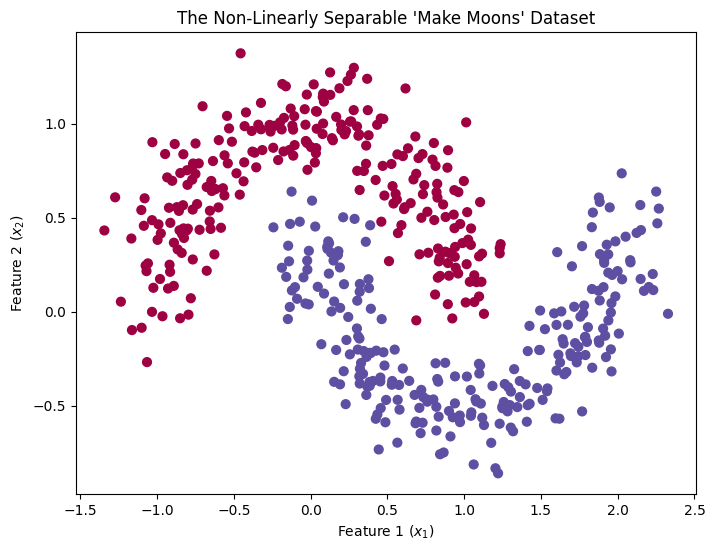

In [ ]:

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral)
plt.title("The Non-Linearly Separable 'Make Moons' Dataset")
plt.xlabel("Feature 1 ($x_1$)")
plt.ylabel("Feature 2 ($x_2$)")
plt.show()

### *Core Utility Functions: Activations, Loss, and Accuracy*

These functions are the building blocks for any neural network.

### *Activation Functions*
Activation functions introduce non-linearity into neural networks, allowing them to learn complex patterns. Each has different properties making it suitable for different layers.


<img src="https://contributor.insightmediagroup.io/wp-content/uploads/2025/09/zigzag_mlp_high_res-1.gif" width="1000"  />

In [ ]:
def sigmoid(Z):
    """Calculates the sigmoid activation function."""
    return 1 / (1 + np.exp(-Z))


In [ ]:
def tanh(Z):
    """Calculates the hyperbolic tangent activation function."""
    return np.tanh(Z)


In [ ]:


def relu(Z):
    """Calculates the Rectified Linear Unit (ReLU)."""
    return np.maximum(0, Z)



![description](https://towardsdatascience.com/wp-content/uploads/2022/06/13YlNRSvp15qWu_a0iss41A-768x517.png)

### 💡 Quick Clarifications on Activation Functions

* **Sigmoid ($\sigma$):** This function is great for **binary classification** because its output is always between **0 and 1**, which can be interpreted as a probability.
* **Tanh (Hyperbolic Tangent):** Similar to Sigmoid, but its output is centered around zero (between **-1 and 1**). This **zero-centered** property makes it generally more effective than Sigmoid for hidden layers in deep networks.
* **ReLU (Rectified Linear Unit):** The most popular choice today. It's simply the input if positive, and **0 if negative**. This simplicity makes it much faster to compute and helps combat the **vanishing gradient problem**.

### *Loss Function*
Binary Cross-Entropy Loss

### *Line-by-Line Explanation of `compute_loss`*

- **The function receives predictions `Y_hat` and true labels `Y`** so it can calculate how far the model's outputs are from the actual values.  
- **`m = Y.shape[1]` extracts the number of training examples**, helping compute the average loss.  
- **`epsilon = 1e-12` adds a tiny constant** to avoid taking `log(0)`, which would cause numerical errors.  
- **The loss formula applies the Binary Cross-Entropy equation**, penalizing confident wrong predictions more heavily.  
- **`np.squeeze(loss)` removes unnecessary dimensions**, returning a clean scalar loss value.


In [ ]:
def compute_loss(Y_hat, Y):
    """
    Computes the Binary Cross-Entropy Loss.
    L = -1/m * sum(Y * log(Y_hat) + (1-Y) * log(1-Y_hat))
    """
    m = Y.shape[1]
    # Epsilon prevents log(0), which is mathematically undefined
    epsilon = 1e-12
    loss = (-1/m) * np.sum(Y * np.log(Y_hat + epsilon) + (1 - Y) * np.log(1 - Y_hat + epsilon))
    return np.squeeze(loss) # sueeze([[3.4]]) return 3.4, squeeze([[[[0.97]]]]) return 0.97

### *Interpretation of Loss Results*

- **Good Predictions → Loss = 0.0783:** Very low loss, meaning the model’s predictions are close to the true labels.  
- **Bad Predictions → Loss = 1.9560:** High loss, showing the predictions are far from the real values.  
- **Perfect Predictions → Loss ≈ 0:** Almost zero loss, indicating the model predicted everything correctly.  
- **Opposite Predictions → Loss = 27.63:** Extremely large loss, representing the worst possible predictions (completely opposite of truth).


In [ ]:
# -----------------------
# Test Scenarios
# -----------------------

# 1. Predictions close to actual labels (good predictions)
Y_true = np.array([[1, 0, 1, 0]])
Y_hat_good = np.array([[0.95, 0.05, 0.90, 0.10]])

# 2. Predictions far from actual labels (bad predictions)
Y_hat_bad = np.array([[0.10, 0.90, 0.20, 0.80]])

# 3. Predictions exactly correct (loss should be very close to 0)
Y_hat_perfect = np.array([[1, 0, 1, 0]])

# 4. Predictions totally opposite (loss should be very large)
Y_hat_opposite = np.array([[0, 1, 0, 1]])

# Compute losses
print("Loss (Good Predictions):", compute_loss(Y_hat_good, Y_true))
print("Loss (Bad Predictions):", compute_loss(Y_hat_bad, Y_true))
print("Loss (Perfect Predictions):", compute_loss(Y_hat_perfect, Y_true))
print("Loss (Opposite Predictions):", compute_loss(Y_hat_opposite, Y_true))


Loss (Good Predictions): 0.07832690502160658
Loss (Bad Predictions): 1.956011502706573
Loss (Perfect Predictions): -1.000088900581841e-12
Loss (Opposite Predictions): 27.631021115928547


### *Accuracy Metric*
Measures classification performance

Percentage of correct predictions

In [ ]:

def calculate_accuracy(Y_hat, Y):
    """
    Calculates the accuracy by comparing predictions to true labels.
    """
    # Convert probabilities (A > 0.5) to binary predictions (0 or 1)
    predictions = (Y_hat > 0.5).astype(int)
    accuracy = np.mean(predictions == Y) * 100
    return accuracy

### *4. Model 1: Single Neuron (Logistic Regression)*

This model serves as our baseline. It has no hidden layers and can only learn a **linear decision boundary**.



![description](https://towardsdatascience.com/wp-content/uploads/2024/09/1Ix7ndz7IMgOh24E803u7Bg-1536x519.png)


### *Mathematical Implementation Details*

Let $n_x$ be the number of features and $m$ be the number of samples.


####  Forward Propagation ($A$)

1. **Linear Step:** $Z = W^T X + b$

   *This formula computes the raw score for each example by combining the inputs with the learned weights and adding the bias.*

   * $W$: $(\mathbf{n_x}, \mathbf{1})$

     *The weight vector — each value tells the model how important a specific feature is.*

   * $X$: $(\mathbf{n_x}, \mathbf{m})$

     *The input data — each column is one training example, each row is one feature.*

   * $b$: $(\mathbf{1}, \mathbf{1})$

     *The bias term — a constant that shifts the output and helps the model fit data even when all features are zero.*

   * $Z$: $(\mathbf{1}, \mathbf{m})$ (Input to the activation)

     *The linear output — a score for each example before applying the sigmoid. Higher values push the prediction toward class 1.*

2. ***Activation Step:** $A = \sigma(Z)$

   *The sigmoid function transforms each score in \(Z\) into a probability between 0 and 1.*

  * $A$: $(\mathbf{1}, \mathbf{m})$ (Output probability)

     *The final model predictions — each value represents “the probability that this sample belongs to class 1.”*



#### *Backward Propagation (Gradients)*
1.  **Output Error:** $dZ = A - Y$

    *This computes how far the model’s predictions are from the true labels — it is the basic error signal passed backward.*

    * $dZ$: $(\mathbf{1}, \mathbf{m})$ (The error signal)

    *A vector showing the prediction error for each training example.*


2.  **Weight Gradient:** $dW = \frac{1}{m} X dZ^T$

    *This calculates how much each feature contributed to the total error, telling the model how to adjust each weight.*

    * $X$: $(\mathbf{n_x}, \mathbf{m})$

    *The input features — they help determine which features caused which errors.*
    * $dZ^T$: $(\mathbf{m}, \mathbf{1})$

    *The error for each sample, reshaped so it can align with \(X\) during multiplication.*

    * $dW$: $(\mathbf{n_x}, \mathbf{1})$

    *The gradient of the weights — one value per feature showing how each weight should change.*

3.  **Bias Gradient:**

    * $db = \frac{1}{m} \sum_{i=1}^{m} dZ^{(i)}$

       *This finds how much the bias contributed to the error on average across all examples.*

    * $db$: $(\mathbf{1}, \mathbf{1})$

       *A single number showing how the bias should be updated to reduce future errors.*








#### *Parameter Update (Gradient Descent)*
$$ W = W - \alpha \cdot dW \quad \text{and} \quad b = b - \alpha \cdot db $$
Where $\alpha$ is the **learning rate**.
This is the **gradient descent update rule**: we adjust weights `W` and bias `b` slightly to reduce error.  

- `dW` and `db` are gradients showing the error’s direction.  
- `α` (learning rate) controls the step size—too big overshoots, too small is slow.




<details>
<summary>Click to see the full Gradient Descent Example</summary>

# Gradient Descent Update — Matrix Form

## Overview


## Example (Numbers)

Let:

$$
X =
\begin{bmatrix}
0.2 & 0.4 & 0.6 \\
1.0 & 0.5 & 0.1
\end{bmatrix},\quad
A = [0.6, 0.3, 0.7],\quad
Y = [1, 0, 1]
$$

Number of examples: $m = 3$

### 1) Compute $dZ$

$$
dZ = A - Y = [-0.4, 0.3, -0.3]
$$

### 2) Compute $dW$

Transpose $dZ$:

$$
dZ^{T} =
\begin{bmatrix}
-0.4 \\ 0.3 \\ -0.3
\end{bmatrix}
$$

Multiply:

$$
X dZ^{T} =
\begin{bmatrix}
0.2 & 0.4 & 0.6 \\
1.0 & 0.5 & 0.1
\end{bmatrix}
\begin{bmatrix}
-0.4 \\ 0.3 \\ -0.3
\end{bmatrix}
=
\begin{bmatrix}
-0.14 \\ -0.28
\end{bmatrix}
$$

Divide by $m=3$:

$$
dW =
\begin{bmatrix}
-0.0467 \\ -0.0933
\end{bmatrix}
$$

### 3) Compute $db$

$$
db = \frac{-0.4 + 0.3 - 0.3}{3} = -0.1333
$$

---

## Gradient Descent Update

Let learning rate $\alpha = 0.1$ and initial parameters:

$$
W =
\begin{bmatrix}
0.5 \\ 0.5
\end{bmatrix},\quad
b = 0.2
$$

Update weights:

$$
W := W - \alpha dW =
\begin{bmatrix}
0.5 \\ 0.5
\end{bmatrix}
-
0.1
\begin{bmatrix}
-0.0467 \\ -0.0933
\end{bmatrix}
=
\begin{bmatrix}
0.50467 \\ 0.50933
\end{bmatrix}
$$

Update bias:

$$
b := b - \alpha db = 0.2 - 0.1(-0.1333) = 0.21333
$$

---

## Final Updated Parameters

$$
W =
\begin{bmatrix}
0.50467 \\ 0.50933
\end{bmatrix},\quad
b = 0.21333
$$

These updated parameters are then used for the next forward pass.

</details>


### *Function: `init_params_single_neuron(n_x)`*

This function initializes the model parameters for a single-neuron logistic regression classifier.  
We create a weight matrix **W** of shape *(n_x, 1)* using small random values so the neuron begins with slight asymmetry.  
The bias term **b** is initialized to zeros with shape *(1, 1)*, ensuring the starting prediction is unbiased.  
Together, these parameters form the core of the learnable model that will adapt through gradient descent.


In [ ]:
def init_params_single_neuron(n_x):
    """Initializes W as (n_x, 1) and b as (1, 1)."""
    # Small random initialization for W, bias set to zero
    W = np.random.randn(n_x, 1) * 0.01
    b = np.zeros((1, 1))
    return {'W': W, 'b': b}

### *Function: `forward_prop_single_neuron(X, params)`*

This function computes the forward propagation step, transforming raw input features into probabilistic predictions.  
First, it performs the linear transformation **Z = WᵀX + b**, which measures how strongly each example aligns with the learned weight vector.  
Then it applies the **sigmoid activation** to produce **A**, a value between 0 and 1 representing the model’s predicted probability.  
Both **Z** and **A** are stored in the cache so they can be reused efficiently during backpropagation.


In [ ]:
def forward_prop_single_neuron(X, params):
    """Forward Pass: Z = W.T * X + b, A = sigmoid(Z)."""
    W, b = params['W'], params['b']
    Z = np.dot(W.T, X) + b
    A = sigmoid(Z)
    cache = {'Z': Z, 'A': A}
    return A, cache

### *Function: `back_prop_single_neuron(X, Y, cache)`*

This function performs backpropagation, computing the gradients that tell the model how to improve.  
The derivative **dZ = A − Y** captures the prediction error signal for all training samples.  
Using this, the gradient with respect to the weights, **dW**, is computed based on how each feature contributed to the error.  
The gradient of the bias, **db**, captures the average error across all samples.  
These gradients are returned so gradient descent can update the parameters and reduce future errors.


In [ ]:
def back_prop_single_neuron(X, Y, cache):
    """Backward Pass: Calculates gradients dW and db."""
    m = X.shape[1]
    A = cache['A']

    dZ = A - Y # Gradient of loss with respect to Z
    dW = (1/m) * np.dot(X, dZ.T) # dW shape (n_x, 1)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True) # db shape (1, 1)

    grads = {'dW': dW, 'db': db}
    return grads

### *Function: `train_single_neuron(...)`*

This is the full training loop for the logistic-regression neuron.  
It initializes the model parameters, then repeatedly performs forward propagation, computes loss, performs backpropagation, and updates the parameters.  
Across epochs, the neuron refines its weights to better separate the two classes using a linear decision boundary.  
The function records the training loss for monitoring convergence and evaluates final performance on validation data.  
This end-to-end pipeline demonstrates the fundamental learning mechanism behind modern deep neural networks.


In [ ]:
def train_single_neuron(X_train, Y_train, X_val, Y_val, n_x, learning_rate=0.01, num_epochs=1000):
    """Trains the single neuron model and records loss."""
    print("\n--- Training Single Neuron (Logistic Regression) ---")
    params = init_params_single_neuron(n_x)
    train_losses = []

    for epoch in range(num_epochs):
        # 1. Forward Pass
        A, cache = forward_prop_single_neuron(X_train, params)

        # 2. Compute Loss
        loss = compute_loss(A, Y_train)
        train_losses.append(loss)

        # 3. Backward Pass
        grads = back_prop_single_neuron(X_train, Y_train, cache)

        # 4. Update Parameters
        params['W'] -= learning_rate * grads['dW']
        params['b'] -= learning_rate * grads['db']

    # Final Validation
    A_final, _ = forward_prop_single_neuron(X_val, params)
    final_acc = calculate_accuracy(A_final, Y_val)
    print(f"Final Single Neuron Validation Accuracy: {final_acc:.2f}%")

    return params, train_losses, final_acc







![description](https://contributor.insightmediagroup.io/wp-content/uploads/2025/05/1oso4zzmTvzOH7pOsrHMqjQ.png)



## *5. Model  2: Single Layer Perceptron (Shallow NN)*

The SLP adds a **hidden layer** with a **non-linear activation function (Tanh)**. This allows the network to learn non-linear relationships and complex decision boundaries, making it suitable for the 'make_moons' data.


###  Definition Multilayer Perceptron (MLP)

A **Multilayer Perceptron (MLP)** is a type of neural network that uses **layers of connected nodes** to learn patterns.  
It is called “multilayer” because it has multiple layers — typically:

- An **input layer**  
- One or more **hidden (middle) layers**  
- An **output layer**

Each node connects to **all nodes in the next layer**.  

During training, the network **adjusts the strength of these connections**:

- Connections that lead to correct predictions become **stronger**  
- Connections that lead to mistakes become **weaker**

This way of learning from examples allows the network to **recognize patterns** and make predictions for **new, unseen situations**.


### **Example: Mini 2D Dataset**

To understand how **MLPs** work, let’s start with a simple example: a **mini 2D dataset** with just a few samples.  


![description](https://towardsdatascience.com/wp-content/uploads/2024/10/1FcPDsrLbqOiMq-e_hMp9EA-768x442.png)




### *Network Structure*

First, let’s look at the parts of simple network:


### *Node (Neuron)*

We begin with the basic structure of a neural network. This structure is composed of many individual units called **nodes** or **neurons**.

- This neural network has **8 nodes**.  
- These nodes are organized into groups called **layers** to work together.




![description](https://towardsdatascience.com/wp-content/uploads/2024/10/1Gx45TOPK467jCrhJXbhyNA-768x440.png)


### *Input Layer*

The input layer is where we start. It takes in our raw data, and the number of nodes here matches how many features we have.

- The input layer has **2 nodes**, one for each feature.








![description](https://towardsdatascience.com/wp-content/uploads/2024/10/10N0FxxRmOiMoCkT4kxkKzw-768x395.png)



### *Hidden Layer*

Next come the hidden layers. We can have one or more of these layers, and we can choose how many nodes each one has. Often, we use fewer nodes in each layer as we go deeper.

- This neural network has **2 hidden layers** with **3** and **2 nodes**, respectively.





![description](https://towardsdatascience.com/wp-content/uploads/2024/10/1s5hs28GaohUzbTt_wHalFg-768x465.png)




### *Output Layer*

The last layer gives us our final answer. The number of nodes in our output layer depends on our task:  

- For **binary classification** or regression, we might have just **1 output node**.  
- For **multi-class problems**, we’d have one node per class.

- This neural network has an **output layer with only 1 node** (because it is binary).





![description](https://towardsdatascience.com/wp-content/uploads/2024/10/1iszGFiTIZOSo14KQ1X5-aw-768x404.png)




### **Weights**

The nodes connect to each other using **weights** — numbers that determine how much each piece of information influences the next layer.

- Every connection between two nodes has its **own weight**.  
- This means we need **many weights**, because:  
  **each node in one layer connects to *every* node in the next layer.**

These weights are what the neural network **learns** during training.


![description](https://towardsdatascience.com/wp-content/uploads/2024/10/1oXHeFD2kL04v2Mzey_AZQg-768x452.png)



### **Biases**

Along with weights, each node also has a **bias** — an extra number that helps it make better decisions.

- **Weights** control the strength of the connections between nodes.
- **Biases** allow each node to shift its output up or down, giving it more flexibility.

Together, weights and biases determine how the neuron transforms its input.


![description](https://towardsdatascience.com/wp-content/uploads/2024/10/1RvVyqJtU9buVe2tzODBkQA-768x577.png)



### **Step 1: Forward Pass**

Let’s see how our network turns input into output, step by step.

#### **Weight initialization**

Before our network can start learning, we need to give each weight a starting value. We choose small random numbers between **-1** and **1**. Starting with random numbers helps our network learn without any early preferences or patterns.




![description](https://towardsdatascience.com/wp-content/uploads/2024/10/1v-BLOj2C43k3X6hNFZScag-768x768.png)





### **Weighted Sum**

Each node processes incoming data in two steps.  
First, it multiplies each input by its **weight** and adds all these values together.  
Then it adds one more number — the **bias** — to complete the calculation.

The bias is essentially a weight with a constant input of **1**.


![description](https://towardsdatascience.com/wp-content/uploads/2024/10/11p4LFrioZ4ZrQpWHLNKyfw-768x768.png)


### **Activation Function**

Each node takes its weighted sum and runs it through an **activation function** to produce its output.  
The activation function introduces **non-linear behavior**, which allows the network to learn complex patterns.

In our hidden layers, we use the **ReLU (Rectified Linear Unit)** function.

ReLU is simple:

- If the number is **positive**, it stays the same.  
- If the number is **negative**, it becomes **zero**.




![description](https://towardsdatascience.com/wp-content/uploads/2024/10/173-_FOH2pBvnn3_50abmnQ-768x781.png)

### **Layer-by-layer Computation**

The two-step process—**weighted sums** followed by **activation**—occurs in every layer, one after another.  
Each layer transforms its inputs into new representations; those outputs become the inputs for the next layer.  
Step by step, the network converts raw input data into the final prediction.




![description](https://towardsdatascience.com/wp-content/uploads/2024/10/1sDcqU0sJrS-QCX3y-WGrwA-768x768.png)

### **Output Generation**

The last layer produces the network’s **final answer**.  
For a yes/no classification task, we use the **sigmoid activation function** in this layer.

The **sigmoid function** converts any number into a value between **0 and 1**, making it ideal for yes/no predictions:

- Closer to **1** → more likely “yes”  
- Closer to **0** → more likely “no”




![description](https://towardsdatascience.com/wp-content/uploads/2024/10/1l2f8QIPkpVos7kCeRNB2cA-768x930.png)

### **Making Predictions**

This **forward pass** process converts our input into a prediction between **0 and 1**.  

But how good are these predictions?  
Next, we measure **how close our predictions are to the correct answers** using a loss function.


### **Step 2: Loss Calculation**

#### **Loss Function**

To evaluate how well our network is performing, we measure the difference between its **predictions** and the **correct answers**.  

For **binary classification**, we use **binary cross-entropy**, which quantifies how far off our predictions are from the true values.




![description](https://towardsdatascience.com/wp-content/uploads/2024/10/1WRe6o8OSqfkdT1ETxHvEDg-768x774.png)

### **Math Notation in Neural Networks**

To improve our network’s performance, we’ll use some **mathematical symbols**.  

Let’s define what each symbol means before we continue:

- **Weights** are represented as **matrices**, and **biases** as **vectors** (or 1-dimensional matrices).  
- The bracket notation `[1]` indicates the **layer number**.  


![description](https://towardsdatascience.com/wp-content/uploads/2024/10/1zH9hXv-iWjF5GvEbTr34cg-768x978.png)



### *Mathematical Implementation Details*

We introduce $n_h$ as the number of hidden units (neurons in the hidden layer).


#### *Forward Propagation ($A_2$)*

---

##### 1. Layer 1 (Hidden)

* **$Z_1 = W_1 X + b_1$**: This calculates the **linear combination** of the input data ($X$) with the weights ($W_1$) and adds the bias term ($b_1$) for the hidden layer.
    * $W_1$: $(\mathbf{n_h}, \mathbf{n_x})$ - **Weights matrix** for the hidden layer, where $\mathbf{n_h}$ is the number of hidden units and $\mathbf{n_x}$ is the number of input features.
    * $X$: $(\mathbf{n_x}, \mathbf{m})$ - **Input data matrix**, where $\mathbf{n_x}$ is the number of input features and $\mathbf{m}$ is the number of training examples.
    * $Z_1$: $(\mathbf{n_h}, \mathbf{m})$ - **Pre-activation parameter** for the hidden layer, representing the result of the linear combination.
* **$A_1 = \tanh(Z_1)$**: This applies the **hyperbolic tangent (tanh) activation function** element-wise to $Z_1$ to introduce non-linearity.
    * $A_1$: $(\mathbf{n_h}, \mathbf{m})$ - **Activation output** of the hidden layer.

---

##### 2. Layer 2 (Output)

* **$Z_2 = W_2 A_1 + b_2$**: This calculates the **linear combination** of the hidden layer's output ($A_1$) with the weights ($W_2$) and adds the bias term ($b_2$) for the output layer.
    * $W_2$: $(\mathbf{n_y}, \mathbf{n_h})$ - **Weights matrix** for the output layer, where $\mathbf{n_y}$ is the number of output units (here $\mathbf{n_y}=1$) and $\mathbf{n_h}$ is the number of hidden units.
    * $A_1$: $(\mathbf{n_h}, \mathbf{m})$ - **Input** to the output layer, which is the activation output of the hidden layer.
    * $Z_2$: $(\mathbf{1}, \mathbf{m})$ - **Pre-activation parameter** for the output layer.
* **$A_2 = \sigma(Z_2)$**: This applies the **sigmoid ($\sigma$) activation function** element-wise to $Z_2$ to squash the output between 0 and 1, suitable for binary classification.
    * $A_2$: $(\mathbf{1}, \mathbf{m})$ - **Final prediction/output** of the neural network.

<details>
<summary>Click to see Forward Propagation Example</summary>

# Forward Propagation — Simple Numeric Example

---

## 1. Layer 1 (Hidden Layer)

Formulas:

- $Z_1 = W_1 X + b_1$  
- $A_1 = \tanh(Z_1)$

### Example:

Assume we have:

$$
X =
\begin{bmatrix}
0.5 & 0.2 \\
0.1 & 0.4
\end{bmatrix} \quad (2 \text{ features, 2 examples})
$$

Hidden layer has 2 neurons:

$$
W_1 =
\begin{bmatrix}
0.1 & 0.3 \\
0.2 & 0.4
\end{bmatrix},\quad
b_1 =
\begin{bmatrix}
0.0 \\ 0.0
\end{bmatrix}
$$

Compute $Z_1$:

$$
Z_1 = W_1 X + b_1 =
\begin{bmatrix}
0.1 & 0.3 \\
0.2 & 0.4
\end{bmatrix}
\begin{bmatrix}
0.5 & 0.2 \\
0.1 & 0.4
\end{bmatrix}
+
\begin{bmatrix}
0 \\ 0
\end{bmatrix}
=
\begin{bmatrix}
0.08 & 0.14 \\
0.14 & 0.2
\end{bmatrix}
$$

Apply tanh activation:

$$
A_1 = \tanh(Z_1) \approx
\begin{bmatrix}
0.0798 & 0.1392 \\
0.1392 & 0.1974
\end{bmatrix}
$$

---

## 2. Layer 2 (Output Layer)

Formulas:

- $Z_2 = W_2 A_1 + b_2$  
- $A_2 = \sigma(Z_2)$

Assume output layer has 1 neuron:

$$
W_2 =
\begin{bmatrix}
0.5 & 0.6
\end{bmatrix},\quad
b_2 = 0
$$

Compute $Z_2$:

$$
Z_2 = W_2 A_1 + b_2 =
\begin{bmatrix}
0.5 & 0.6
\end{bmatrix}
\begin{bmatrix}
0.0798 & 0.1392 \\
0.1392 & 0.1974
\end{bmatrix}
=
\begin{bmatrix}
0.1273 & 0.2117
\end{bmatrix}
$$

Apply sigmoid activation:

$$
A_2 = \sigma(Z_2) =
\frac{1}{1+e^{-Z_2}} \approx
\begin{bmatrix}
0.5317 & 0.5528
\end{bmatrix}
$$

---

## Interpretation

- $A_2$ is the **final prediction** for the two examples.  
- Values are between 0 and 1 — suitable for **binary classification**.

</details>


#### *Backward Propagation (Gradients - Chain Rule)* 📉

We calculate gradients from the output layer ($dZ_2$) backward to the hidden layer ($dZ_1$).

---

##### 1. Output Layer Error

* **$dZ_2 = A_2 - Y$**: This calculates the **error** (the derivative of the Loss $\mathcal{L}$ with respect to the pre-activation $Z_2$) by taking the difference between the final prediction ($A_2$) and the true labels ($Y$).
    * $dZ_2$: $(\mathbf{1}, \mathbf{m})$ - **Error term** for the output layer. This size is equivalent to the dimensions of $A_2$ and $Y$.

---

##### 2. Layer 2 Gradients

* **$dW_2 = \frac{1}{m} dZ_2 A_1^T$**: This calculates the **gradient** of the Loss with respect to the output layer **weights ($W_2$)**. The term $\frac{1}{m}$ is for averaging across all $\mathbf{m}$ training examples.
* **$db_2 = \frac{1}{m} \sum dZ_2$**: This calculates the **gradient** of the Loss with respect to the output layer **bias ($b_2$)** by summing $dZ_2$ across the $\mathbf{m}$ examples and averaging.
    * $dW_2$: $(\mathbf{1}, \mathbf{n_h})$ - **Gradient matrix** for $W_2$.
    * $db_2$: $(\mathbf{1}, \mathbf{1})$ - **Gradient vector** for $b_2$.

---

##### 3. Hidden Layer Error

* **We must propagate $dZ_2$ back through $W_2$ and the Tanh derivative.**
$$dZ_1 = (W_2^T dZ_2) \odot (1 - A_1^2)$$
* **$W_2^T dZ_2$**: This term propagates the error backward from the output layer to the hidden layer's pre-activation, scaling the error by the transpose of the output weights $W_2$.
    * $(W_2^T dZ_2)$: $(\mathbf{n_h}, \mathbf{m})$ - The **propagated error**.
* **$(1 - A_1^2)$**: This is the element-wise **derivative of the $\tanh(Z_1)$ activation function** with respect to $Z_1$.
    * $(1 - A_1^2)$: $(\mathbf{n_h}, \mathbf{m})$ - The **Tanh derivative** applied element-wise (Hadamard product $\odot$) for scaling.
    * $dZ_1$: $(\mathbf{n_h}, \mathbf{m})$ - **Error term** for the hidden layer (derivative of $\mathcal{L}$ with respect to $Z_1$).

---

##### 4. Layer 1 Gradients

* **$dW_1 = \frac{1}{m} dZ_1 X^T$**: This calculates the **gradient** of the Loss with respect to the hidden layer **weights ($W_1$)**, using the input $X$ and averaging over $\mathbf{m}$ examples.
* **$db_1 = \frac{1}{m} \sum dZ_1$**: This calculates the **gradient** of the Loss with respect to the hidden layer **bias ($b_1$)** by summing $dZ_1$ across the $\mathbf{m}$ examples and averaging.
    * $dW_1$: $(\mathbf{n_h}, \mathbf{n_x})$ - **Gradient matrix** for $W_1$.
    * $db_1$: $(\mathbf{n_h}, \mathbf{1})$ - **Gradient vector** for $b_1$.

<details>
<summary>Click to see Backward Propagation Example</summary>

# Backward Propagation — Numeric Example

We continue from the previous Forward Propagation example:

- Hidden layer activations:  
$$
A_1 \approx
\begin{bmatrix}
0.0798 & 0.1392 \\
0.1392 & 0.1974
\end{bmatrix}
$$
- Output layer activations:  
$$
A_2 \approx [0.5317, 0.5528]
$$
- True labels:  
$$
Y = [1, 0]
$$
- Number of examples: $m = 2$

---

## 1) Output Layer Error

$$
dZ_2 = A_2 - Y = [0.5317-1, 0.5528-0] = [-0.4683, 0.5528]
$$

Shape: $(1, 2)$

---

## 2) Output Layer Gradients

### Weight gradient:

$$
dW_2 = \frac{1}{m} dZ_2 A_1^T
$$

Compute:

$$
dZ_2 =
\begin{bmatrix}-0.4683 & 0.5528 \end{bmatrix},\quad
A_1^T =
\begin{bmatrix}
0.0798 & 0.1392 \\
0.1392 & 0.1974
\end{bmatrix}^T =
\begin{bmatrix}
0.0798 & 0.1392 \\
0.1392 & 0.1974
\end{bmatrix}
$$

Multiply $dZ_2$ by $A_1^T$ and average:

$$
dW_2 = \frac{1}{2}
\begin{bmatrix}-0.4683 & 0.5528 \end{bmatrix}
\begin{bmatrix}
0.0798 & 0.1392 \\
0.1392 & 0.1974
\end{bmatrix}
\approx
\begin{bmatrix}0.0333 & 0.0461\end{bmatrix}
$$

### Bias gradient:

$$
db_2 = \frac{1}{m} \sum dZ_2 = \frac{-0.4683 + 0.5528}{2} \approx 0.04225
$$

---

## 3) Hidden Layer Error

$$
dZ_1 = (W_2^T dZ_2) \odot (1 - A_1^2)
$$

- $W_2^T =
\begin{bmatrix}
0.5 \\ 0.6
\end{bmatrix}$
- Compute $W_2^T dZ_2$:

$$
W_2^T dZ_2 =
\begin{bmatrix}0.5 \\ 0.6\end{bmatrix}
\begin{bmatrix}-0.4683 & 0.5528\end{bmatrix} =
\begin{bmatrix}
-0.23415 & 0.2764 \\
-0.28098 & 0.33168
\end{bmatrix}
$$

- Tanh derivative: $1 - A_1^2 \approx
\begin{bmatrix}
1 - 0.0798^2 & 1 - 0.1392^2 \\
1 - 0.1392^2 & 1 - 0.1974^2
\end{bmatrix} \approx
\begin{bmatrix}
0.9936 & 0.9806 \\
0.9806 & 0.9610
\end{bmatrix}$

Element-wise multiply:

$$
dZ_1 \approx
\begin{bmatrix}
-0.23415*0.9936 & 0.2764*0.9806 \\
-0.28098*0.9806 & 0.33168*0.9610
\end{bmatrix}
\approx
\begin{bmatrix}
-0.2325 & 0.2710 \\
-0.2754 & 0.3185
\end{bmatrix}
$$

---

## 4) Hidden Layer Gradients

### Weight gradient:

$$
dW_1 = \frac{1}{m} dZ_1 X^T
$$

$$
X^T =
\begin{bmatrix}
0.5 & 0.1 \\
0.2 & 0.4
\end{bmatrix}
$$

Multiply and average:

$$
dW_1 = \frac{1}{2}
\begin{bmatrix}-0.2325 & 0.2710 \\
-0.2754 & 0.3185
\end{bmatrix}
\begin{bmatrix}
0.5 & 0.1 \\
0.2 & 0.4
\end{bmatrix}
\approx
\begin{bmatrix}
0.0095 & 0.0524 \\
0.0126 & 0.0709
\end{bmatrix}
$$

### Bias gradient:

$$
db_1 = \frac{1}{m} \sum dZ_1 \approx
\frac{1}{2}
\begin{bmatrix}
-0.2325 + 0.2710 \\
-0.2754 + 0.3185
\end{bmatrix} =
\begin{bmatrix}
0.01925 \\
0.02155
\end{bmatrix}
$$

---

## Interpretation

- $dZ_2$, $dW_2$, $db_2$: **Output layer errors and gradients**  
- $dZ_1$, $dW_1$, $db_1$: **Hidden layer errors and gradients propagated backward**  
- These are ready for **Gradient Descent updates** using $W := W - \alpha dW$ and $b := b - \alpha db$.

</details>


### *Initialization of Model Parameters (Single Hidden Layer)*

This function initializes the **weights ($W$)** and **biases ($b$)** for a two-layer network using specific strategies to aid training.

### Inputs

* **`n_x`**: Number of **input features**.
* **`n_h`**: Number of **hidden units**.
* **`n_y`**: Number of **output units** (typically 1 for binary classification).

### Initialization Strategy

* **Weights ($W_1$, $W_2$)**: Initialized **randomly** using `np.random.randn` and scaled by **$0.01$**. This breaks symmetry and prevents initial saturation of activation functions ($\tanh$).
* **Biases ($b_1$, $b_2$)**: Initialized to **zero** using `np.zeros`.


The function returns a dictionary `params` containing $W_1, b_1, W_2, b_2$.

In [ ]:
def init_params_slp(n_x, n_h, n_y):
    """Initializes W1 (n_h, n_x), b1 (n_h, 1), W2 (n_y, n_h), b2 (n_y, 1)."""
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    params = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return params

### *Forward Propagation Function (`forward_prop_slp`)*

This function executes the complete **forward pass** through the two-layer neural network, transforming the input data ($X$) into the final prediction ($A_2$).

### Function Inputs and Outputs

* **Input (`X`)**: The dataset matrix, where features are stacked vertically ($\mathbf{n_x}$ rows) and training examples are stacked horizontally ($\mathbf{m}$ columns).
* **Input (`params`)**: A dictionary containing the initialized weight and bias parameters ($W_1, b_1, W_2, b_2$).
* **Output (`A2`)**: The final prediction vector, a single row representing the probability $P(Y=1|X)$ for each example.
* **Output (`cache`)**: A dictionary storing intermediate values ($Z_1, A_1, Z_2, A_2$). These values are **essential** for calculating the gradients during the subsequent Backward Propagation step.

---

### 1. Layer 1 (Hidden Layer) Calculation

The hidden layer uses the **Hyperbolic Tangent ($\tanh$)** activation function.

* **`Z1 = np.dot(W1, X) + b1`**: Calculates the **pre-activation** for the hidden layer. This is a matrix multiplication ($\text{np.dot}$) of the hidden layer weights ($W_1$) with the input data ($X$), plus the bias vector ($b_1$).
    * **Dimension Check**: $(\mathbf{n_h}, \mathbf{n_x}) \times (\mathbf{n_x}, \mathbf{m}) + (\mathbf{n_h}, 1) \rightarrow (\mathbf{n_h}, \mathbf{m})$
* **`A1 = tanh(Z1)`**: Applies the **$\tanh$ activation** element-wise to $Z_1$. This introduces the necessary non-linearity, allowing the network to learn complex decision boundaries.

---

### 2. Layer 2 (Output Layer) Calculation

The output layer uses the **Sigmoid ($\sigma$)** activation function, suitable for binary classification.

* **`Z2 = np.dot(W2, A1) + b2`**: Calculates the **pre-activation** for the output layer. The input here is the activated output from the hidden layer ($A_1$).
    * **Dimension Check**: $(\mathbf{1}, \mathbf{n_h}) \times (\mathbf{n_h}, \mathbf{m}) + (\mathbf{1}, 1) \rightarrow (\mathbf{1}, \mathbf{m})$
* **`A2 = sigmoid(Z2)`**: Applies the **sigmoid activation** element-wise to $Z_2$. This squashes the final value between 0 and 1, interpreting it as a probability.

---

### 3. Caching Intermediate Values

* **`cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}`**: All intermediate results are stored in the `cache` dictionary. This is a crucial step that avoids recalculating these values during the Backward Propagation phase.

In [ ]:
def forward_prop_slp(X, params):
    """Forward Pass: Input -> Tanh Hidden -> Sigmoid Output."""
    W1, b1, W2, b2 = params['W1'], params['b1'], params['W2'], params['b2']

    # Layer 1 (Hidden)
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)

    # Layer 2 (Output)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}
    return A2, cache

### *Backward Propagation Function (`back_prop_slp`)*

This function executes the **backward pass** using the chain rule to compute the gradients ($\mathbf{dW}$ and $\mathbf{db}$) for all parameters. These gradients are necessary for the Gradient Descent optimization step.

### Function Inputs and Outputs

* **Input (`X`)**: The original input data matrix.
* **Input (`Y`)**: The true labels/ground truth.
* **Input (`params`)**: The current weights and biases ($W_2$ is specifically extracted).
* **Input (`cache`)**: The intermediate values ($A_1, A_2$) stored from the forward pass.
* **Output (`grads`)**: A dictionary containing the calculated gradients: $\mathbf{dW_1, db_1, dW_2, db_2}$.

---

### 1. Layer 2 Backpropagation (Output Layer)

This calculates the error and gradients for the final layer, which uses the **Sigmoid** activation and the **Log Loss** cost function.

* **`dZ2 = A2 - Y`**: This is the efficient way to calculate the derivative of the cost function with respect to the pre-activation $Z_2$ for Sigmoid and Log Loss. It simply represents the **prediction error**.
    * **Dimensions**: $(\mathbf{1}, \mathbf{m})$
* **`dW2 = (1/m) * np.dot(dZ2, A1.T)`**: Calculates the **weight gradient ($dW_2$)** by multiplying the error $dZ_2$ with the transpose of the input to this layer ($A_1$). The result is averaged by $\mathbf{m}$.
    * **Dimensions**: $(\mathbf{1}, \mathbf{n_h})$
* **`db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)`**: Calculates the **bias gradient ($db_2$)** by summing the error $dZ_2$ across all examples and averaging by $\mathbf{m}$.
    * **Dimensions**: $(\mathbf{1}, \mathbf{1})$

---

### 2. Layer 1 Backpropagation (Hidden Layer)

This calculates the error and gradients for the hidden layer, which uses the **Tanh** activation.

* **`dA1 = np.dot(W2.T, dZ2)`**: This is the crucial step of propagating the error backward. The output layer error $dZ_2$ is scaled by the **transpose of $W_2$** to get the error contribution at $A_1$.
    * **Dimensions**: $(\mathbf{n_h}, \mathbf{m})$
* **`dZ1 = dA1 * (1 - np.power(A1, 2))`**: This applies the **derivative of the Tanh activation**. The error $dA_1$ is scaled element-wise (Hadamard product) by the Tanh derivative term, $1 - A_1^2$, to get the final error term $dZ_1$.
    * **Dimensions**: $(\mathbf{n_h}, \mathbf{m})$

* **`dW1 = (1/m) * np.dot(dZ1, X.T)`**: Calculates the **weight gradient ($dW_1$)** by multiplying the hidden layer error $dZ_1$ with the transpose of the input to this layer ($X$). The result is averaged by $\mathbf{m}$.
    * **Dimensions**: $(\mathbf{n_h}, \mathbf{n_x})$
* **`db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)`**: Calculates the **bias gradient ($db_1$)** by summing $dZ_1$ across all examples and averaging by $\mathbf{m}$.
    * **Dimensions**: $(\mathbf{n_h}, \mathbf{1})$

In [ ]:
def back_prop_slp(X, Y, params, cache):
    """Backward Pass: Calculates gradients for W1, b1, W2, b2."""
    m = X.shape[1]
    W2 = params['W2']
    A1, A2 = cache['A1'], cache['A2']

    # --- Layer 2 Backprop (Output) ---
    dZ2 = A2 - Y # (1, m)
    dW2 = (1/m) * np.dot(dZ2, A1.T) # (1, n_h)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True) # (1, 1)

    # --- Layer 1 Backprop (Hidden) ---
    # 1. Error propagated back from Layer 2: dL/dA1 = W2.T * dZ2
    dA1 = np.dot(W2.T, dZ2) # (n_h, m)
    # 2. Apply Tanh derivative: dL/dZ1 = dL/dA1 * g'(Z1) where g'(Z1) = 1 - A1^2
    dZ1 = dA1 * (1 - np.power(A1, 2)) # (n_h, m)

    # 3. Layer 1 Gradients
    dW1 = (1/m) * np.dot(dZ1, X.T) # (n_h, n_x)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True) # (n_h, 1)

    grads = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}
    return grads

### *Training Loop Function (`train_slp`)*

This function orchestrates the entire learning process for the Single Layer Perceptron (SLP) model, iteratively adjusting the parameters using **Gradient Descent** to minimize the training loss.

### Function Inputs and Parameters

| Parameter | Purpose | Default Value |
| :--- | :--- | :--- |
| **`X_train`, `Y_train`** | Training data and true labels. | N/A |
| **`X_val`, `Y_val`** | Validation data and true labels for final performance check. | N/A |
| **`n_x`, `n_h`, `n_y`** | Defines the network **architecture** (input, hidden, and output sizes). | N/A |
| **`learning_rate`** | Controls the step size during parameter updates (how aggressively parameters are changed). | $0.01$ |
| **`num_epochs`** | The total number of times the model will iterate over the entire training dataset. | $1000$ |

---

### The Training Cycle (Epoch Loop)

The core of the function is the `for epoch in range(num_epochs)` loop, where the following four steps are repeated until convergence:

#### 1. Forward Pass
* **`A2, cache = forward_prop_slp(X_train, params)`**: The current parameters are used to generate predictions ($\mathbf{A_2}$) from the training data ($\mathbf{X_{train}}$). The intermediate results ($Z$ and $A$ values) are stored in `cache`.

#### 2. Compute Loss
* **`loss = compute_loss(A2, Y_train)`**: The difference between the model's predictions ($\mathbf{A_2}$) and the true labels ($\mathbf{Y_{train}}$) is quantified using the Cost Function (e.g., Log Loss). This value is recorded in `train_losses`.

#### 3. Backward Pass
* **`grads = back_prop_slp(X_train, Y_train, params, cache)`**: The gradients ($\mathbf{dW_1}, \mathbf{db_1}, \mathbf{dW_2}, \mathbf{db_2}$) are calculated by backpropagating the loss through the network using the chain rule, utilizing the values stored in `cache`.

#### 4. Parameter Update (Gradient Descent)
* **`params[...] -= learning_rate * grads[...]`**: This is the core **Gradient Descent** step. All parameters are updated simultaneously by subtracting the product of the **`learning_rate`** and the corresponding **gradient ($\mathbf{d W}$ or $\mathbf{d b}$)**.
    * **Formula**: $\theta = \theta - \alpha \frac{\partial \mathcal{L}}{\partial \theta}$, where $\theta$ is a parameter, and $\alpha$ is the learning rate.

---

### Final Evaluation

After the training loop completes, the final model parameters are used to assess performance on the held-out validation set ($\mathbf{X_{val}}$):

* **`A2_final, _ = forward_prop_slp(X_val, params)`**: A final forward pass is executed on the validation set.
* **`final_acc = calculate_accuracy(A2_final, Y_val)`**: The model's final prediction accuracy is calculated and printed.

The function returns the **final optimized parameters**, the **history of training losses**, and the **final validation accuracy**.

In [ ]:


def train_slp(X_train, Y_train, X_val, Y_val, n_x, n_h, n_y, learning_rate=0.01, num_epochs=1000):
    """Trains the Single Layer Perceptron model and records loss."""
    print("\n--- Training Single Layer Perceptron ---")
    params = init_params_slp(n_x, n_h, n_y)
    train_losses = []

    for epoch in range(num_epochs):
        # 1. Forward Pass
        A2, cache = forward_prop_slp(X_train, params)

        # 2. Compute Loss
        loss = compute_loss(A2, Y_train)
        train_losses.append(loss)

        # 3. Backward Pass
        grads = back_prop_slp(X_train, Y_train, params, cache)

        # 4. Update Parameters for both layers
        params['W1'] -= learning_rate * grads['dW1']
        params['b1'] -= learning_rate * grads['db1']
        params['W2'] -= learning_rate * grads['dW2']
        params['b2'] -= learning_rate * grads['db2']

    # Final Validation
    A2_final, _ = forward_prop_slp(X_val, params)
    final_acc = calculate_accuracy(A2_final, Y_val)
    print(f"Final Single Layer Perceptron Validation Accuracy: {final_acc:.2f}%")

    return params, train_losses, final_acc

### *Visualization Tools*

These helper functions let us visualize the learning process (loss reduction) and the final result (the decision boundary).

In [ ]:
def plot_loss(lr_losses, slp_losses, num_epochs):
    """Plots the loss history for both models."""
    plt.figure(figsize=(12, 6))
    epochs = range(num_epochs)

    plt.plot(epochs, lr_losses, label='Single Neuron (Logistic Regression) Loss', color='blue')
    plt.plot(epochs, slp_losses, label='Single Layer Perceptron Loss', color='red')

    plt.title('Training Loss Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Binary Cross-Entropy Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_decision_boundary(model_forward_fn, params, X, Y, title):
    """
    Plots the decision boundary for a model (called for both models).
    """
    # Define the plot region and create a grid
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict classifications for the entire grid
    Z_input = np.c_[xx.ravel(), yy.ravel()].T
    A, _ = model_forward_fn(Z_input, params)
    Z = (A > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.6)
    plt.scatter(X[0, :], X[1, :], c=Y.ravel(), cmap=plt.cm.Spectral, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1 ($x_1$)")
    plt.ylabel("Feature 2 ($x_2$)")
    plt.show()

## *Execution and Model Comparison*

We now execute the training and visualization for both models using consistent hyperparameters to directly compare the results. Note the dramatic difference in performance due to the non-linear hidden layer in the SLP.


--- Training Single Neuron (Logistic Regression) ---
Final Single Neuron Validation Accuracy: 85.00%


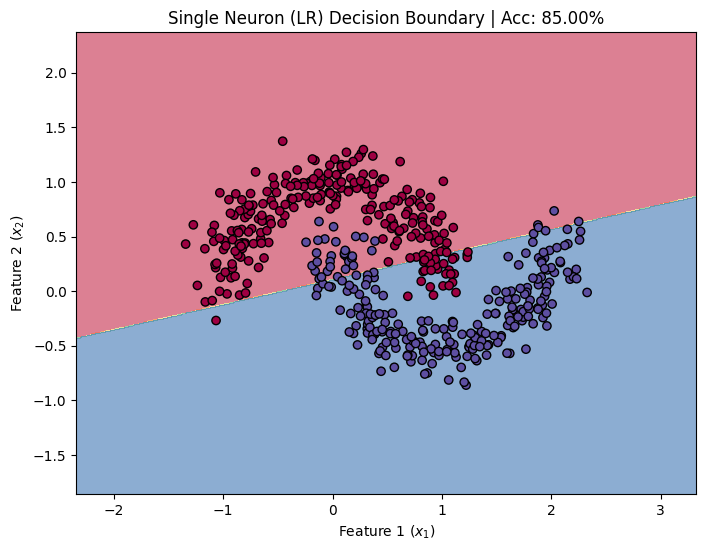


--- Training Single Layer Perceptron ---
Final Single Layer Perceptron Validation Accuracy: 100.00%


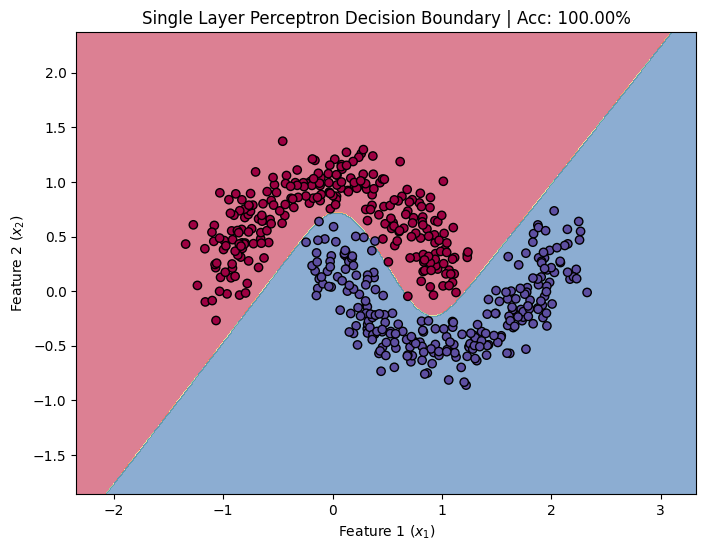

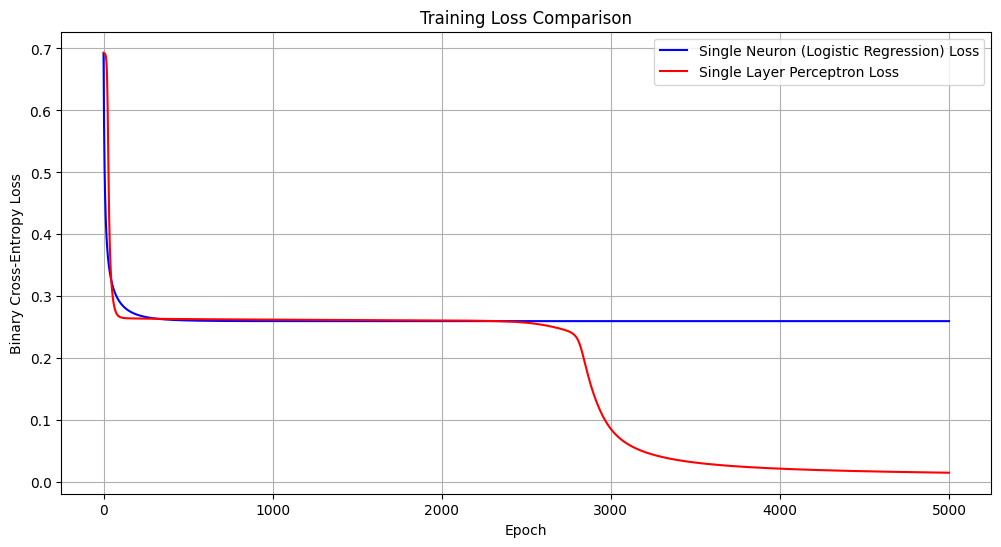


           MODEL PERFORMANCE COMPARISON
Single Neuron (Logistic Regression) Validation Accuracy: 85.00%
Single Layer Perceptron Validation Accuracy:           100.00%
---------------------------------------------
Conclusion: The Single Layer Perceptron successfully learned the non-linear boundary, achieving high accuracy.
The simple Single Neuron (LR) failed to separate the data, proving the necessity of the hidden layer and non-linearity.


In [ ]:
# Define hyper-parameters
n_h = 8               # Number of hidden units for SLP
n_y = Y_train.shape[0] # Number of output units (1)
learning_rate = 0.5
num_epochs = 5000

# 1. Train Single Neuron (Logistic Regression)
lr_params, lr_losses, lr_acc = train_single_neuron(
    X_train, Y_train, X_val, Y_val, n_x, learning_rate, num_epochs
)

# 2. Plot LR Decision Boundary
plot_decision_boundary(
    forward_prop_single_neuron, lr_params, X, Y,
    f"Single Neuron (LR) Decision Boundary | Acc: {lr_acc:.2f}%"
)

# 3. Train Single Layer Perceptron
slp_params, slp_losses, slp_acc = train_slp(
    X_train, Y_train, X_val, Y_val, n_x, n_h, n_y, learning_rate, num_epochs
)

# 4. Plot SLP Decision Boundary
plot_decision_boundary(
    forward_prop_slp, slp_params, X, Y,
    f"Single Layer Perceptron Decision Boundary | Acc: {slp_acc:.2f}%"
)

# 5. Plot Loss Comparison
plot_loss(lr_losses, slp_losses, num_epochs)

# 6. Compare Models
print("\n=============================================")
print("           MODEL PERFORMANCE COMPARISON")
print("=============================================")
print(f"Single Neuron (Logistic Regression) Validation Accuracy: {lr_acc:.2f}%")
print(f"Single Layer Perceptron Validation Accuracy:           {slp_acc:.2f}%")
print("---------------------------------------------")

if slp_acc > lr_acc + 5:
    print("Conclusion: The Single Layer Perceptron successfully learned the non-linear boundary, achieving high accuracy.")
    print("The simple Single Neuron (LR) failed to separate the data, proving the necessity of the hidden layer and non-linearity.")
else:
    print("Conclusion: The performance difference was small, which might suggest a hyperparameter tuning issue or an unusual data split.")

### *Building the same model with TensorFlow & Keras*

In [ ]:
# Generate 1000 samples with some noise to make the task realistic
X: np.ndarray
y: np.ndarray
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

# X contains 2 features (2D coordinates), y contains binary class labels (0 or 1)
print(f"Features shape (X): {X.shape}") # Expected: (1000, 2)
print(f"Labels shape (y): {y.shape}")   # Expected: (1000,)
print(f"Number of Class 0 samples: {np.sum(y == 0)}")
print(f"Number of Class 1 samples: {np.sum(y == 1)}")

Features shape (X): (1000, 2)
Labels shape (y): (1000,)
Number of Class 0 samples: 500
Number of Class 1 samples: 500


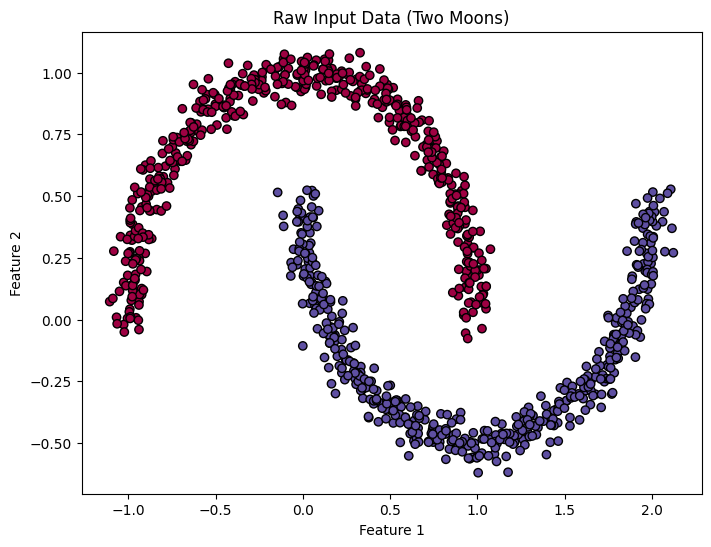

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
plt.title("Raw Input Data (Two Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
X_train: np.ndarray
X_test: np.ndarray
y_train: np.ndarray
y_test: np.ndarray

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# *6.  Neural Networks with TensorFlow & Keras*

---

### *Introduction to TensorFlow & Keras*


### *6.1.1 What is TensorFlow?*
<img src="https://upload.wikimedia.org/wikipedia/commons/2/2d/Tensorflow_logo.svg" width="70" align="left" style="margin-right: 20px; margin-left: 20px; margin-bottom: 10px;">

> **TensorFlow** is an end-to-end open-source platform for machine learning developed by Google.  
> It provides a comprehensive ecosystem of **tools, libraries, and community resources**<br> that lets researchers and developers build and deploy ML-powered applications.
<br clear="left">

### *What is Keras?*
**Keras** is a high-level neural networks API written in Python that runs on top of TensorFlow.  
It was designed for **user-friendliness, modularity, and extensibility**, making it perfect for **fast experimentation and prototyping**.

>**The Relationship**<br>
> Think of TensorFlow as the **powerful engine** that handles complex mathematical computations,  
> while Keras is the **intuitive steering wheel and dashboard** that makes it easy to control and monitor your deep learning models.

In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

## *Your First Neural Network: Sequential Model & Dense Layers*

###  *- The Sequential Model*
The **Sequential model** in Keras is a simple stack of layers, where each layer has one input and one output.  
It’s perfect for beginners and works well for problems like the moon dataset classification.

### *- Dense Layers: The Building Blocks*
A **Dense layer** (fully-connected layer) connects every neuron in one layer to every neuron in the next.  
This is the most common layer in neural networks.

#### *- Choosing the Number of Neurons*

- **Input Layer:**  
  * Matches the number of features in your data.  
  * *Example:* 2 neurons for the moon dataset (x and y coordinates).

- **Output Layer:**  
  * Determines the number of classes.  
  * *Example:* 1 neuron with sigmoid activation for binary classification.

- **Hidden Layers:**
  We often need more neurons than the input to capture the shape, but not too many.
  * **Rule of Thumb:** Use powers of 2 (e.g., 4, 8, 16).
  * *Example:* For the moon dataset, **8 neurons** is usually a good balance.
  > Too many neurons/layers can cause overfitting.

### *Our Model Architecture<br>*
 >Input: 2 neurons  
 >Hidden: 8 neurons  
 >Output: 1 neuron (sigmoid activation)

In [ ]:
X_train.shape[1]

2

In [ ]:
model = Sequential([
    Input(shape=(X_train.shape[1],), name="input_layer"),
    Dense(8, activation="relu", name="hidden_layer"),
    Dense(1, activation="sigmoid", name="output_layer")
], name="one_hidden_layer_model")

## *Understanding and Calculating the Number of Parameters*

### *What Are Parameters?*
Parameters are the **weights and biases** that the model learns during training:  
- **Weight:** Each connection between neurons has a weight.  
- **Bias:** Each neuron has a bias term.

### *Dense Layer Formula*
> **Parameters = (input_neurons × output_neurons) + output_neurons**  
- `input_neurons × output_neurons` → number of weights  
- `+ output_neurons` → number of biases  

### *Example: Moon Dataset*
**First hidden layer:** 2 inputs → 8 neurons  
- Weights: 2 × 8 = 16  
- Biases: 8  
- **Total parameters:** 16 + 8 = 24  
**Output layer:** 8 → 1 neuron → (8 × 1) + 1 = 9  

**Total parameters:** 24 + 9 = 33

### *Understanding `model.summary()`*
- **Layer (type):** Shows the type and order of layers  
- **Output Shape:** Shape of each layer’s output  
- **Param #:** Number of parameters in each layer


In [ ]:
model.summary()

Model: "one_hidden_layer_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

## *Compiling the Model*

Before training, we need to **compile the model**. This is where we define:

- **Optimizer:** How the model updates its weights.  
   `"adam"` is a popular choice that adapts the learning rate automatically.

- **Loss Function:** Measures how well the model is performing.  
   `"binary_crossentropy"` is used for **binary classification** problems like the moon dataset.

- **Metrics:** Metrics to track during training.  
   `["accuracy"]` shows the proportion of correct predictions.

In [ ]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

## *Training the Model*

After compiling the model, we train it using `model.fit()`.  
This is where the model **learns patterns** from the training data.

### *What Happens During Training?*
- The model goes through the data multiple times (epochs)
- Updates weights to reduce the loss
- Evaluates performance using the chosen metric (accuracy)

### *Key Arguments in `model.fit()`*

- `X_train, y_train`
  Your input data and labels used to train the model.

- `validation_split=0.2`<br>
  Reserves 20% of the training data for validation to check how well the model generalizes.

- `epochs=200`  
  Number of times the model sees the entire training dataset.

- `batch_size=32`  
  The model processes 32 samples at a time before updating weights.

- `verbose=1`  
  Shows progress during training.

In [ ]:
history= model.fit(
    X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, verbose=1
)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4976 - loss: 0.7187 - val_accuracy: 0.4938 - val_loss: 0.7158
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5309 - loss: 0.6829 - val_accuracy: 0.5312 - val_loss: 0.6845
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5437 - loss: 0.6615 - val_accuracy: 0.5562 - val_loss: 0.6562
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6309 - loss: 0.6229 - val_accuracy: 0.5750 - val_loss: 0.6305
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6599 - loss: 0.6188 - val_accuracy: 0.6438 - val_loss: 0.6073
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6564 - loss: 0.5910 - val_accuracy: 0.6687 - val_loss: 0.5865
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6661 - loss: 0.5714 - val_accuracy: 0.8125 - val_loss: 0.5667
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7123 - loss: 0.5680 - val_accuracy: 0.8687 - 

## *Evaluating the Model*

After training, we use the **test set** to measure how well the model performs on data it has *never seen before*.

### `model.evaluate()`
This function returns two values:

- **loss** — how far the model’s predictions are from the true labels  
- **accuracy** — the percentage of correct predictions

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9274 - loss: 0.1632  


## *Plotting Loss Curves*

This plot shows how the model’s loss changes during training.

- **Training Loss:** Loss on the batches the model learns from.  
- **Validation Loss:** Loss on the held-out validation part of the training data.

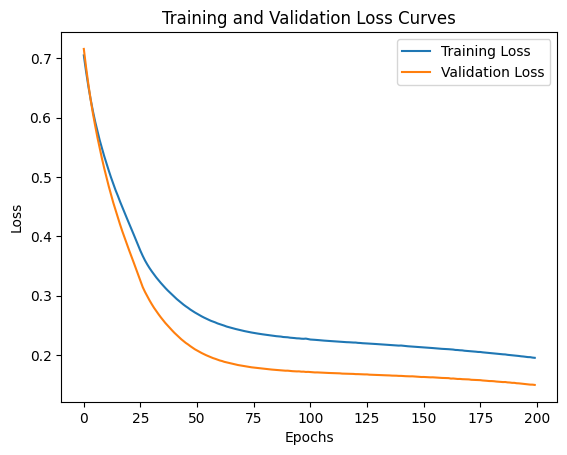

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Exercise:**

You previously built a neural network with **one hidden layer of 8 neurons**.  

Now your task:

1. Add a **second hidden layer** to the model.  
2. Fill in the **summary table** below with the **Output Shape** and **Param #** for each layer.  
3. Calculate the **Total params and Trainable params.** manually.  
3. Verify your calculations using `.summary()`.

In [ ]:
model1 = Sequential([
    Input(shape=(X_train.shape[1],), name="input_layer"),
    ### start your code here

    ### end your code here
], name="two_hidden_layer_model")


| Layer (type)         | Output Shape | Param # |
|----------------------|-------------|---------|
| hidden_layer1 (Dense)| (None, 8)   | 33      |
| hidden_layer2 (Dense)| (None, ???) | ???     |
| output_layer (Dense) | (None, 1)   | ???     |
|======================|=============|=========|
| Total params:        |             | ???     |
| Trainable params:    |             | ???     |
| Non-trainable params:|             | 0       |

### Fill in the integers below based on the network diagram


In [ ]:
my_hidden2_Output_Shape = 0   # How many neurons in layer 2?
my_hidden2_params   = 0
my_output_params    = 0
my_total_params     = 0
my_trainable_params = 0


<details>
<summary> Hint (click to expand)</summary>

- The second hidden layer usually has **fewer or equal neurons** than the first hidden layer.   
- Input layer parameters are determined by the number of input features.  
- Output layer has 1 neuron with a bias.
- Assuming `input_features = X_train.shape[1]`:
  - First hidden layer: `(input_features * 8) + 8`  
  - Second hidden layer: `(8 * chosen_units) + chosen_units`  
  - Output layer: `(second_hidden_units * 1) + 1`
</details>

### call `.summary()` to verify your calculations

In [ ]:
# model1.summary()

### Train and evaluate your `"two_hidden_layer_model"` -> `model1`

- Uncomment the code and run the cell.

> **Help (optional):** To remove `#` from multiple lines quickly, first select the lines (with the mouse or press `Ctrl + A` to select all), then press `Ctrl + /` (Windows) or `Cmd + /` (Mac) instead of deleting them manually.


In [ ]:
# model1.compile(
#     optimizer="adam",
#     loss="binary_crossentropy",
#     metrics=["accuracy"]
# )
# history1= model1.fit(
#     X_train, y_train,
#  validation_split=0.2, epochs=150, batch_size=32, verbose=1
# )

In [ ]:
# loss, accuracy = model1.evaluate(X_test, y_test)

In [ ]:
# plt.plot(history1.history['loss'], label='Training Loss')
# plt.plot(history1.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss Curves')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# *7. Top 6 common pitfalls :*

Here is a guide to the most common issues beginners encounter in deep learning, how to spot them, and how to fix them.

* **1. Overfitting (The Memorizer Model)**
    * **Definition & Cause:** The model learns the **training data** and its inherent noise/peculiarities too well, leading to near-perfect performance on the training set but poor generalization to new, unseen data. It typically happens when the model is too complex (too many layers/neurons) relative to the amount of training data, or when training is run for too many epochs.
    * **Symptoms:** **Training Loss** decreases steadily, but the **Validation Loss** starts to increase significantly after a certain point. The model performs extremely well on the training data (high accuracy) but poorly on the test/validation data.
    * **Solution/Remediation:** Implement **Early Stopping** (stop training when validation performance degrades). Use **Regularization** techniques like **L1/L2 regularization** or **Dropout**. Get more training data or perform **Data Augmentation**. Simplify the model architecture.

* **2. Underfitting (The Simple Model)**
    * **Definition & Cause:** The model is **too simple** or lacks the capacity to capture the underlying patterns and relationships in the data. It cannot achieve a low error rate even on the training data. This is often due to an overly shallow or narrow network, or training for too few epochs.
    * **Symptoms:** High **Training Loss** and high **Validation Loss** that plateau at a sub-optimal level. The model's performance is poor on both training and test data, suggesting it hasn't learned the data's core features.
    * **Solution/Remediation:** Increase the model's **complexity** (add more layers or neurons). Ensure the data is properly scaled and pre-processed. Train for more epochs. Experiment with a different, more powerful model architecture.

* **3. Incorrect Learning Rate Selection**
    * **Definition & Cause:** The **Learning Rate** determines the step size taken during optimization. A rate that is **too high** causes the optimizer to overshoot the minimum of the loss function. A rate that is **too low** causes the model to take too long to converge or get stuck in a poor local minimum.
    * **Symptoms:**
        * **Too High:** Loss spikes or oscillates wildly, potentially leading to divergence (Exploding Gradients).
        * **Too Low:** Loss decreases extremely slowly, and training takes an unreasonable amount of time.
    * **Solution/Remediation:** Use a **Learning Rate Finder** technique to estimate a good starting rate. Start with a small rate and incrementally increase it. Employ **Learning Rate Scheduling** (e.g., step decay, cosine decay) to decrease the rate over time. Use adaptive optimizers like **Adam** or **RMSProp**, which manage per-parameter learning rates.

* **4. Inconsistent or Unscaled Data**
    * **Definition & Cause:** The input features have vastly different ranges (e.g., one feature ranges from 0 to 1, while another ranges from 1 to 1,000,000). Optimizers struggle in this scenario because the loss function surface becomes long and narrow, making gradient descent oscillate inefficiently.
    * **Symptoms:** Slow convergence and unstable training. The model is highly sensitive to the initial learning rate.
    * **Solution/Remediation:** **Standardize** the data (mean of 0, standard deviation of 1) or **Normalize** the data (scale features to a range, e.g., 0 to 1). Applying this to all inputs is a fundamental pre-processing step. Use **Batch Normalization** layers within the network, which normalize the activations of the previous layer for every mini-batch.

* **5. Using the Wrong Loss Function**
    * **Definition & Cause:** The chosen **loss function** (or objective function) does not correctly reflect the goal of the task or the distribution of the target variable. For example, using **Mean Squared Error (MSE)** for a **binary classification** task instead of **Binary Cross-Entropy**.
    * **Symptoms:** Poor model performance even after extensive training. The loss value might appear low, but the real-world metric (e.g., accuracy, F1-score) is poor.
    * **Solution/Remediation:**
        * **Regression:** Use **MSE** or **Mean Absolute Error (MAE)**.
        * **Binary Classification:** Use **Binary Cross-Entropy (Log Loss)**.
        * **Multi-Class Classification:** Use **Categorical Cross-Entropy** (for one-hot encoded targets) or **Sparse Categorical Cross-Entropy** (for integer-encoded targets).
        * **Imbalanced Data:** Consider weighted loss functions or F1-score/AUC as the primary metric.

* **6. Incorrect Use of Batch Normalization (BN) Layers**
    * **Definition & Cause:** BN is powerful for stabilizing training, but beginners sometimes place it incorrectly. A common mistake is using BN **after** the activation function (e.g., ReLU) instead of **before** it, which can limit the non-linearity of the activation. Another issue is using BN with a very small **batch size**, as the statistics calculated from a tiny batch are unreliable.
    * **Symptoms:** Training is unstable or performance is worse than a network without BN. High variance in the final model performance across different runs.
    * **Solution/Remediation:** The recommended sequence for a layer is: **Linear/Convolution -> Batch Normalization -> Activation**. Ensure your **batch size is sufficiently large** (e.g., >= 32) when using BN, as its performance depends on reliably estimating batch statistics.


# *8. Real Applications Deep Learning*

### **1. Computer Vision: Teaching Machines to "See"**

  ·   Medical Imaging: Analyzing X-rays, MRIs, and CT scans to detect tumors, fractures, and other abnormalities with accuracy rivaling or surpassing human experts.
  
  ·   Autonomous Vehicles: Enabling self-driving cars to perceive their environment by identifying pedestrians, other vehicles, traffic signs, and lane markings.
  
  ·   Facial Recognition: Used for unlocking phones (Face ID), airport security, and law enforcement.
  
  ·   Industrial Automation: Performing visual quality control on assembly lines to detect product defects.
  
  ·   Augmented Reality (AR): Overlaying digital information onto the real world by understanding the geometry and objects in a scene.


### **2. Natural Language Processing (NLP): Teaching Machines to "Understand" Language**

  ·   Machine Translation: Services like Google Translate and DeepL provide near-human-quality translation between languages.
  
  ·   Chatbots and Virtual Assistants: Powering sophisticated customer service agents (on websites) and conversational AI like ChatGPT, Claude, and Google Assistant.
  
  ·   Sentiment Analysis: Automatically determining if a product review, social media post, or news article is positive, negative, or neutral.
  
  ·   Text Summarization: Creating concise summaries of long documents, legal contracts, or research papers.
  
  ·   Content Generation: Writing marketing copy, email drafts, code, and creative stories.

### **3. Speech: Teaching Machines to "Hear" and "Speak"**

  *   Automatic Speech Recognition (ASR): Transcribing spoken words into text, used in voice-to-text apps, closed captioning, and virtual assistants.
  
  ·   Text-to-Speech (TTS): Generating incredibly natural-sounding human speech from text, used in audiobooks, navigation systems, and voice assistants.
  
  ·   Speaker Identification: Verifying a person's identity by their voice (e.g., for phone banking security).
  
  ·   Voice-Controlled Systems: Powering smart home devices (Amazon Alexa, Google Home) that respond to voice commands.

### **4. Healthcare: A Transformative and High-Impact Domain**

  ·   Drug Discovery: Accelerating the process of finding new molecules and predicting their effectiveness and side effects, reducing R&D time from years to months.
  
  ·   Personalized Medicine: Analyzing a patient's genetic data, lifestyle, and medical history to recommend tailored treatment plans and predict disease risk.
  
  ·   Medical Diagnosis: As mentioned in Computer Vision, but also combining lab results, doctor's notes (using NLP), and genomic data for a more comprehensive diagnosis.
  
  ·   Robotic Surgery: Assisting surgeons with enhanced precision and providing real-time analytics and guidance during operations.

### **5. Recommendation Systems: The Engine of Engagement**

  ·   E-commerce: "Customers who bought this also bought..." on Amazon.
  
  ·   Streaming Services: Recommending the next movie to watch on Netflix or song to listen to on Spotify.
  
  ·   Social Media: Curating your news feed on Facebook, Instagram, and TikTok to show you content you're most likely to engage with.
  
  ·   News Aggregators: Personalizing the news feed in apps like Google News based on your reading history and interests.

 Deep learning has moved from academic research to being a core technological pillar, driving innovation and creating intelligent systems across virtually every sector of the economy.




### 🥳 Congratulations! You've Completed the Deep Learning Fundamentals You've successfully built a strong foundation in Deep Learning—that's a huge milestone! Take a moment to appreciate the complex concepts you've mastered, from neural networks and backpropagation to optimizing models 🥉.
### But remember, this is just the starting line. The field of Deep Learning is vast, rapidly evolving, and holds the key to solving some of the world's most challenging problems .




#**Thank** **you**